# Covid-19 Unemployemnt in USA - population analysis

In this notebook we analyze unemployment in Usa by inital claims,continued claims, Insured  unemployment rates, and  Average job postings(in second part) .

We compare all the states and its population in relation to other criteria's mentioned above.

Data source 1 : [Unemployment Insurance Weekly Claims Data](https://oui.doleta.gov/unemploy/claims.asp)

This data is used in current economic analysis  of unemployment trends in USA, and each of its state. 
Initial claims measure unemployment and continued weeks  claimed measure  the number of person claiming unemployment benifits

Data source 2: [Average level of job postings](https://github.com/OpportunityInsights/EconomicTracker)

This data is Job postings data from Burning Glass Technologies.
It provides average level job postings byby different industries like Manufacturing, financial activities, professional and business services, education and health services, leisure and hospitality.

This numbers are in realtive to data from January 4-31,2020 .
So we can get a bit of idea about before and during effects of the pandemic.

In [393]:
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from flask import Markup
import plotly
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)


In [440]:
#data source - United states department of labour https://oui.doleta.gov/unemploy/claims.asp
df = pd.read_csv('./data/unemp_claims.csv',sep="\t")
# group states together and taking mean values

#df_statewise
df.head()
df['Initial Claims'] = df['Initial Claims'].str.replace(',', '').astype(float)
df['Continued Claims'] = df['Continued Claims'].str.replace(',', '').astype(float)
df['Covered Employment'] = df['Covered Employment'].str.replace(',', '').astype(float)

df_statewise = df.groupby(['State']).mean().reset_index()

#merge population
df_state  = pd.read_csv('./data/EconomicTracker/data/GeoIDs - State.csv')
df_statewise = df_statewise.merge(df_state,left_on='State',right_on='statename')
df_statewise['population'] = df_statewise['state_pop2019']
df_statewise = df_statewise.drop(['state_pop2019'],axis=1)
#df_statewise

## Merrge region code -
df_region = pd.read_csv('./data/region_code.csv').filter(['State Code','Region'])
df_statewise = df_statewise.merge(df_region,left_on='stateabbrev',right_on='State Code')
#df_statewise


## Part 1: Unemployment Insurance claims - state aggregate

In [234]:
#df_statewise.head()

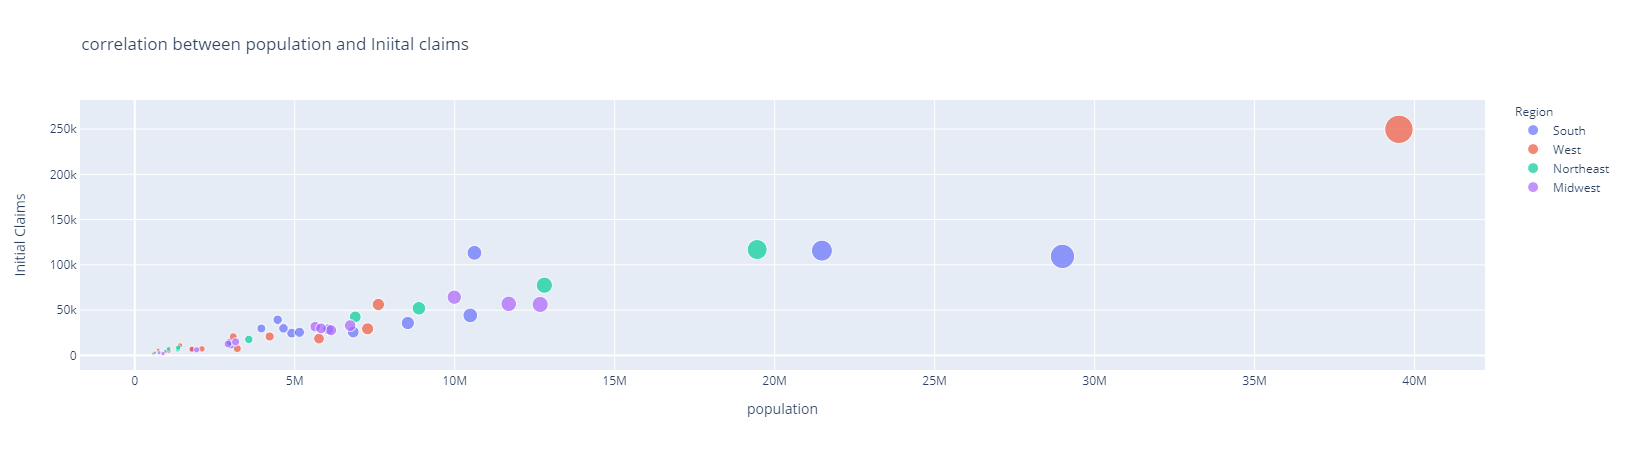

In [442]:
px.scatter(df_statewise,y="Initial Claims",x="population",color="Region",hover_data=["statename"],size="population",title="correlation between population and Iniital claims")

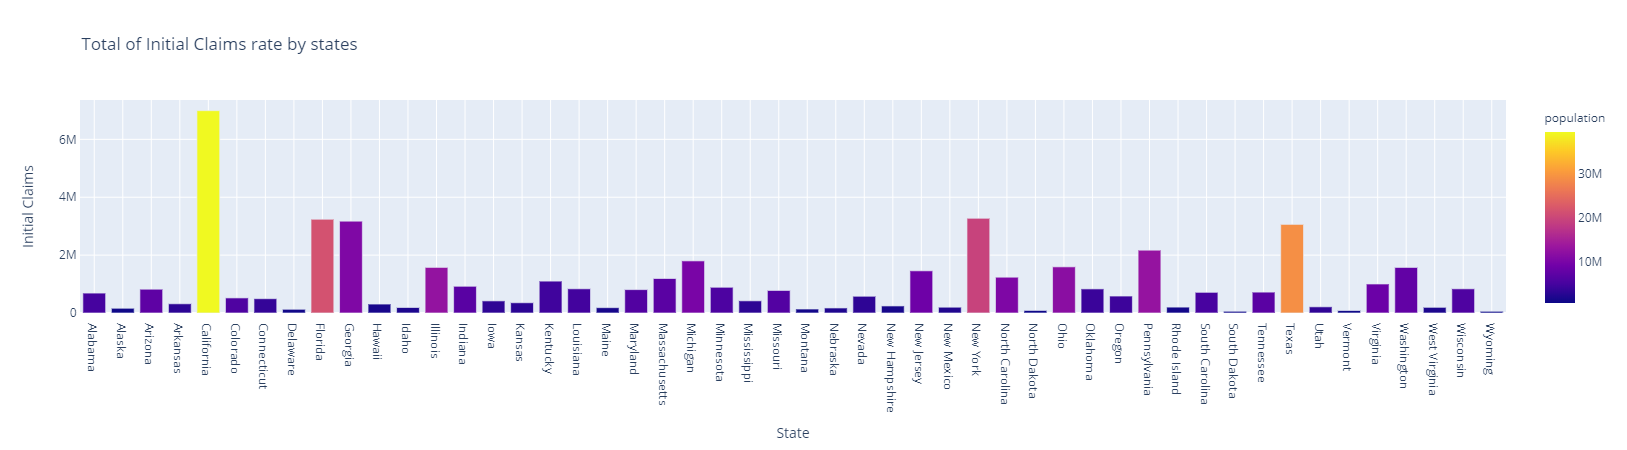

In [407]:
fig = px.bar(df_statewise,x='State',y='Initial Claims',title ="Total of Initial Claims rate by states",color='population')
fig.show()

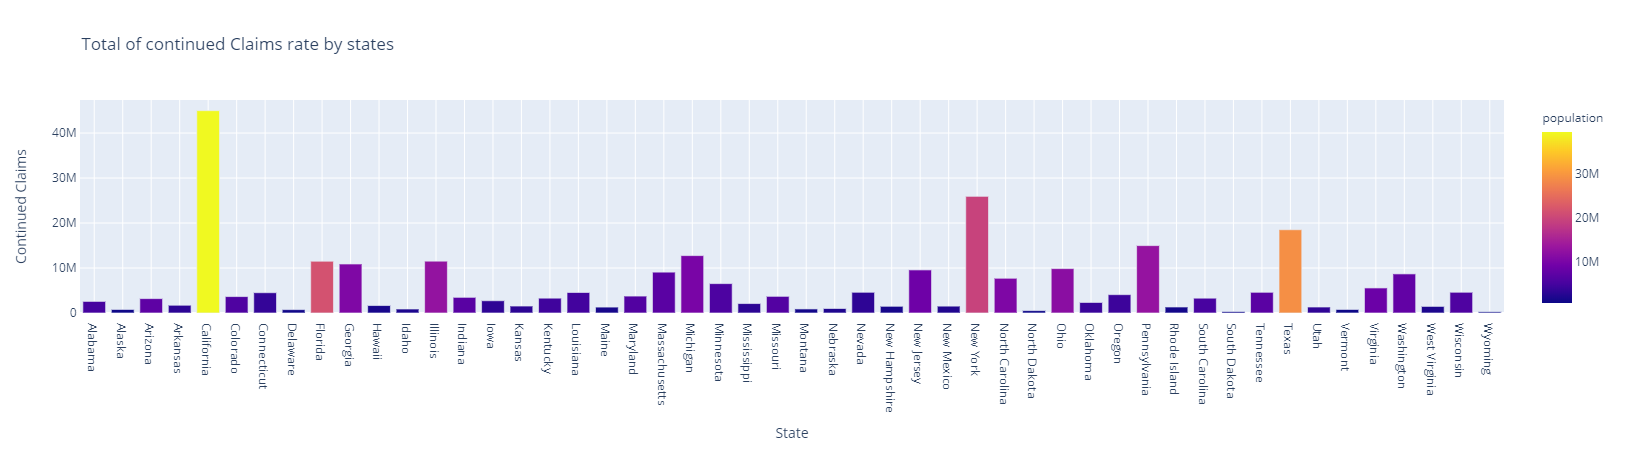

In [303]:
px.bar(df_statewise,x='State',y='Continued Claims',title ="Total of continued Claims rate by states",color='population')

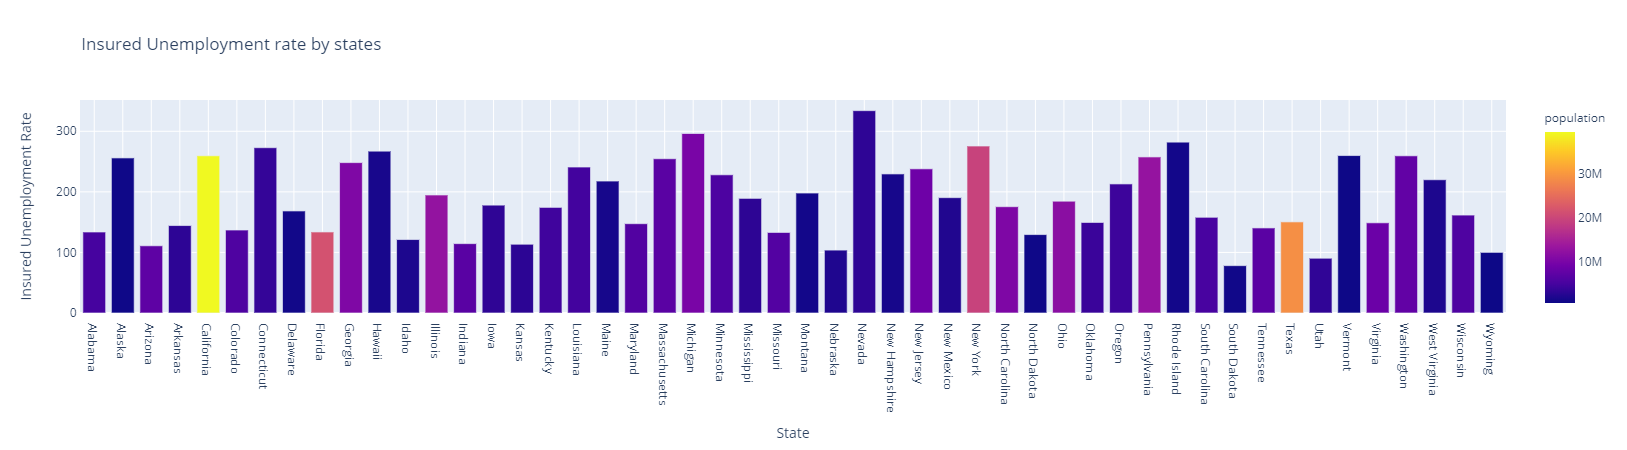

In [408]:
px.bar(df_statewise,x='State',y='Insured Unemployment Rate',title ="Insured Unemployment rate by states",color='population')

In [298]:
#px.line(df,x='Filed week ended',y='Initial Claims',hover_data=['State'],title='Time line of Initial Claims',color='State')

### Treemap for Insurance claims (with poulation) from all states

We can Immideately see some anamolies , such as -
- Florida and texas depite having a high population, has a low value for Insured Unemployment rate
- Whereas Nevada and Rhode Island with lesser population has a high Insured Unemployment rate

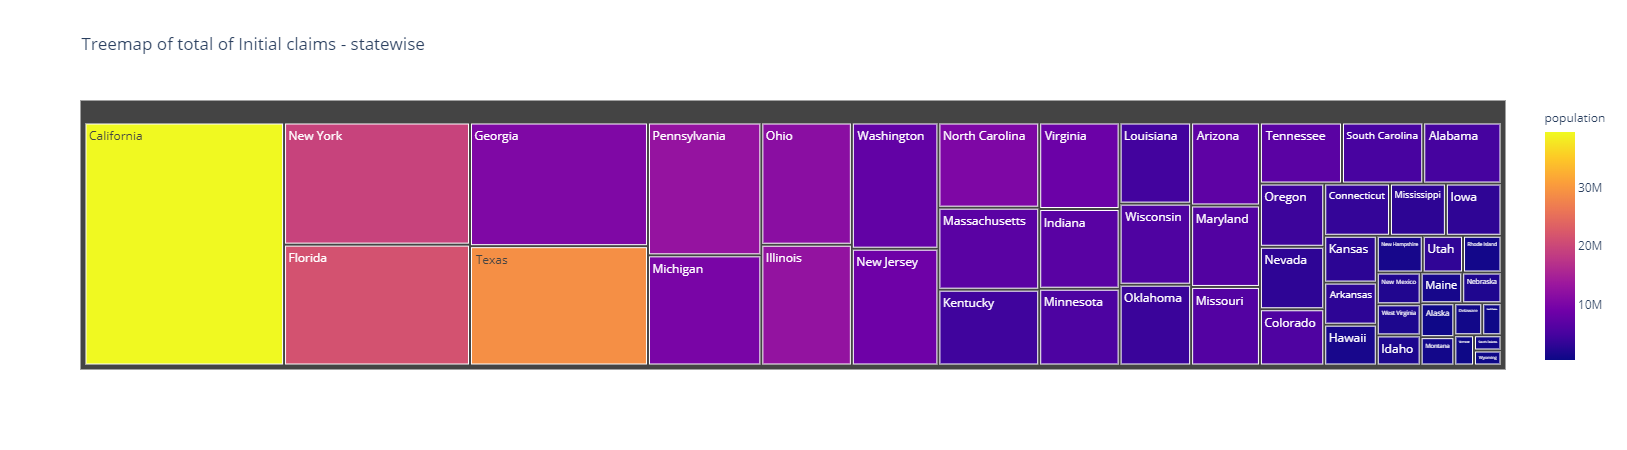

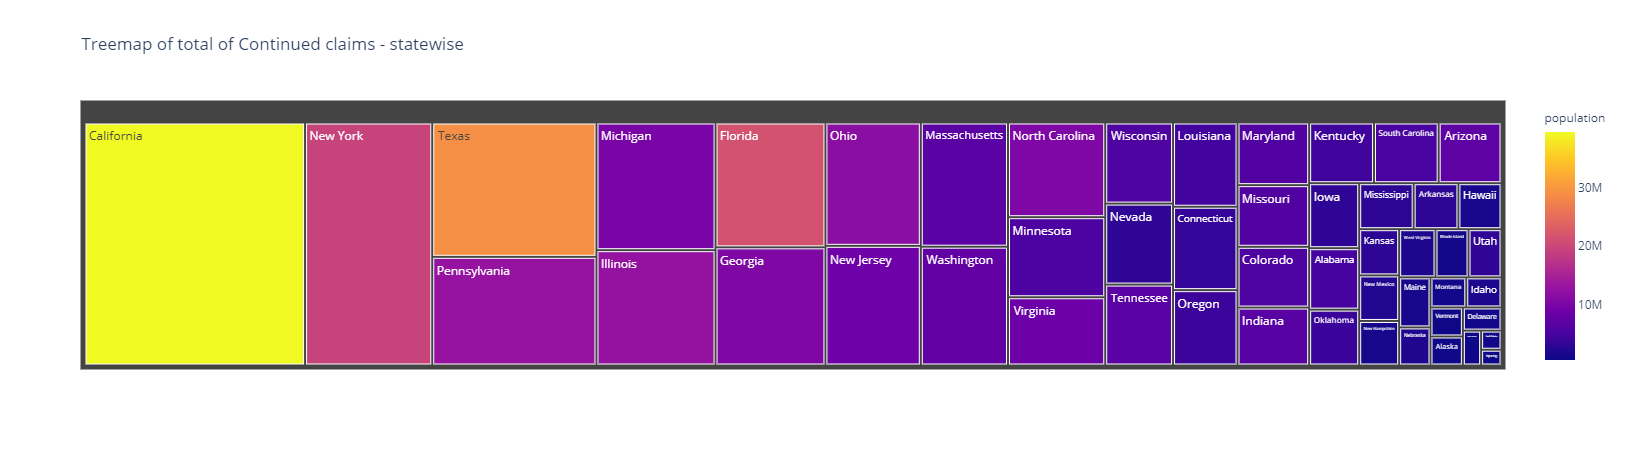

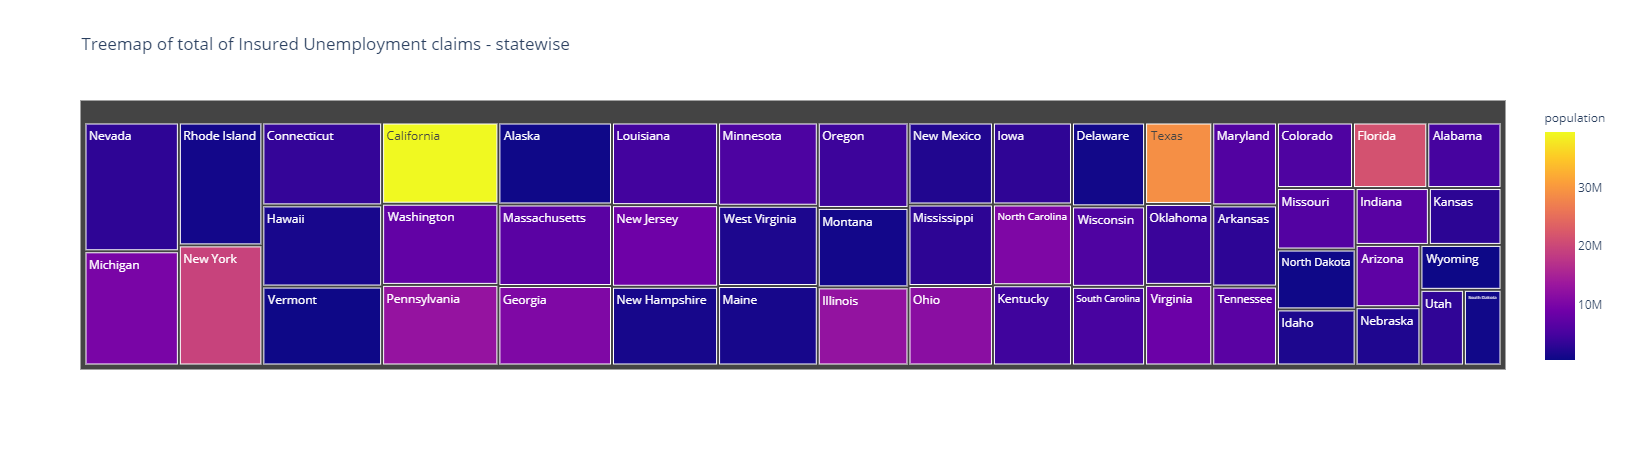

In [409]:
#color_continuous_scale=px.colors.sequential.Viridis
fig = px.treemap(df_statewise, path=['State'], values='Initial Claims',color='population',title="Treemap of total of Initial claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Continued Claims',color='population',title="Treemap of total of Continued claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Insured Unemployment Rate',color='population',title="Treemap of total of Insured Unemployment claims - statewise")
fig.show()

## Part 2 :Average Job postings
What do the values mean?

The valuesare average job postings relative to Jan 4-32,2020 .So If the sscores are in positive there are more job postings now when compared to jan , 
and if the scores are in negative there are less job postings comparitively

In [417]:
#data prep
df_state  = pd.read_csv('./data/EconomicTracker/data/GeoIDs - State.csv')
df_burning  = pd.read_csv('./data/EconomicTracker/data/Burning Glass - State - Weekly.csv')

df_burnings = df_burning.iloc[:,0:10]
df_burnings['day']=df_burnings['day_endofweek']
df_burnings['date'] = pd.to_datetime(df_burnings[['year', 'month', 'day']])
df_burnings = df_burnings.drop(['year','month','day_endofweek','day'],axis=1)
#df_burnings.columns

#rename
df_burnings.columns = ['statefips', 'all industries', 'manufacturing', 'financial activities',
       'professional and business services', 'education and health services', 'leisure and hospitality', 'date']
df_burnings
df_burnings = df_burnings.merge(df_state,on='statefips')

## Merrge region code -
df_region = pd.read_csv('./data/region_code.csv').filter(['State Code','Region'])
df_burnings = df_burnings.merge(df_region,left_on='stateabbrev',right_on='State Code')
df_burnings

##statewise
df_burnings_state = df_burnings.groupby(['statename','stateabbrev','Region']).mean().reset_index()
df_burnings_state['population'] = df_burnings_state['state_pop2019']
df_burnings_state = df_burnings_state.drop(['state_pop2019'],axis=1)
df_burnings_state.head()



#datewise
df_burnings_date = df_burnings.groupby(['date']).mean().reset_index()
#df_burnings_state['population'] = df_burnings_state['state_pop2019']
df_burnings_date = df_burnings_date.drop(['state_pop2019','statefips'],axis=1)

#date_state_wise
df_burnings_date_state = df_burnings.groupby(['date','statename','state_pop2019','Region']).mean().reset_index()
df_burnings_date_state['population'] = df_burnings_date_state['state_pop2019']
df_burnings_date_state = df_burnings_date_state.drop(['state_pop2019'],axis=1)
#df_burnings_date_state.head()

#df_burnings_state.head()


### Timeline of Average job postings - Different industry comparision (relative to January 4-31 2020)

One interesting factor to note here is the effect  of lockdown , according to a report, Twenty-six U.S. states see a rise in coronavirus cases since easing up on lockdown restrictions. - [source](https://www.thinkglobalhealth.org/article/updated-timeline-coronavirus)

We can also see a surge in job postings(especially leisure and hospitality) during June, July after a drop during April,May.

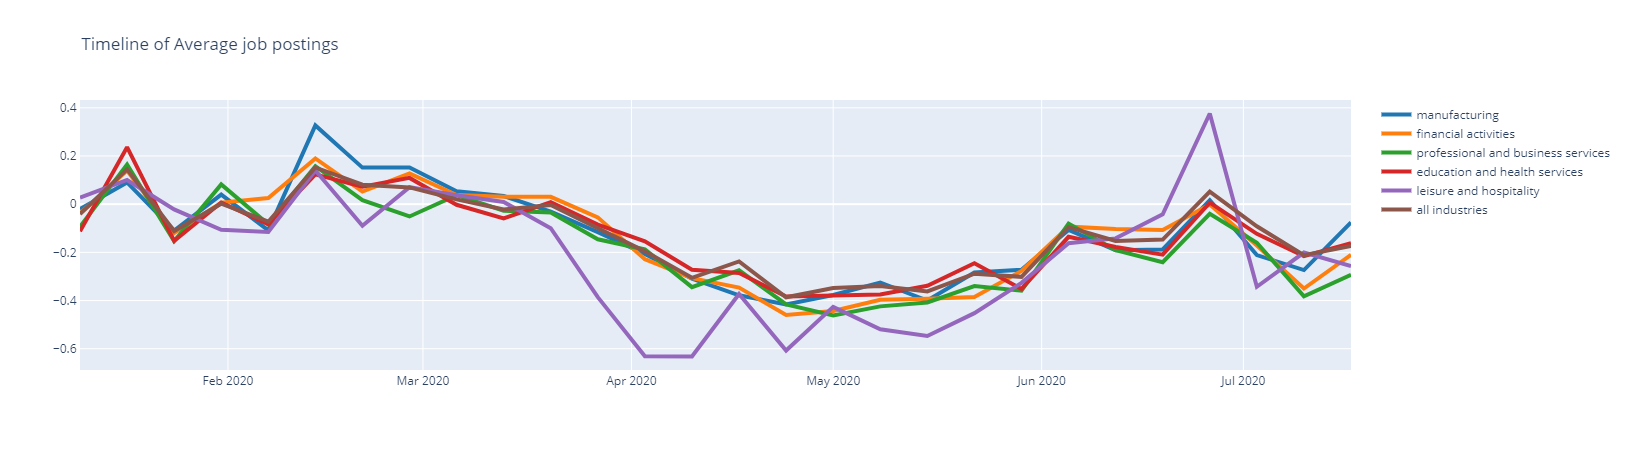

In [418]:
data = df_burnings_date
fig = go.Figure()
cols = plotly.colors.DEFAULT_PLOTLY_COLORS

# Create and style traces
fig.add_trace(go.Scatter(x=data['date'], y=data['manufacturing'], name='manufacturing',showlegend=True,
                         line=dict(color=cols[0], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['financial activities'], name='financial activities',showlegend=True,
                         line=dict(color=cols[1], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['professional and business services'], name='professional and business services',showlegend=True,
                         line=dict(color=cols[2], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['education and health services'], name='education and health services',showlegend=True,
                         line=dict(color=cols[3], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['leisure and hospitality'], name='leisure and hospitality',showlegend=True,
                         line=dict(color=cols[4], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['all industries'], name='all industries',showlegend=True,
                         line=dict(color=cols[5], width=4)))
fig.update_layout(title='Timeline of Average job postings')

fig.show()

The high variance in values of average job postings leisure and hospitality is also seen in box plot below.

Whereas Education and health services are fairly stable during the pandemic.

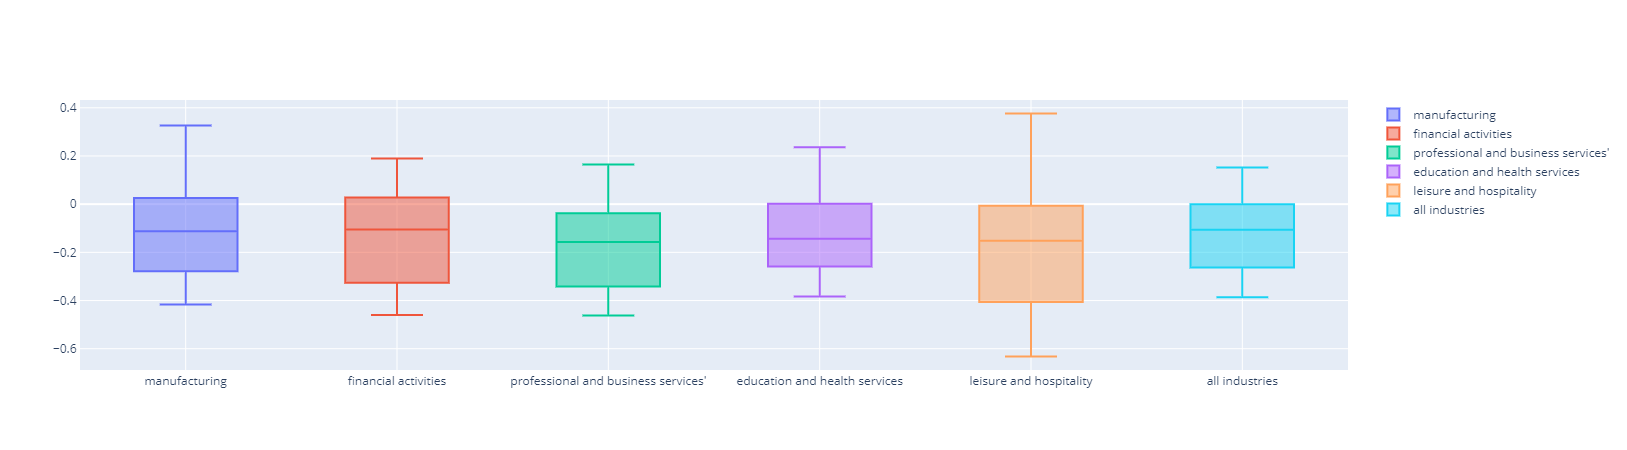

In [419]:
df = df_burnings_date
trace0 = go.Box(y=df["manufacturing"],name="manufacturing")
trace1 = go.Box(y=df["financial activities"],name="financial activities")
trace2 = go.Box(y=df["professional and business services"],name="professional and business services'")
trace3 = go.Box(y=df["education and health services"],name="education and health services")
trace4 = go.Box(y=df["leisure and hospitality"],name="leisure and hospitality")
trace5 = go.Box(y=df["all industries"],name="all industries")
data = [trace0, trace1,trace2,trace3,trace4,trace5]

iplot(data)

### Time line of average job posting for All Industries, by different states
Since Leisure and hospitality gave high variance , we will plot its timeline for all the states.
We will also color it with different regions, to analyse if there is any pattern.
things to note- 

- Most od the states follow a similar pattern od drop during April,May and surge in June, July.
- postings in Hawaii hasn't yet recovered after the drop

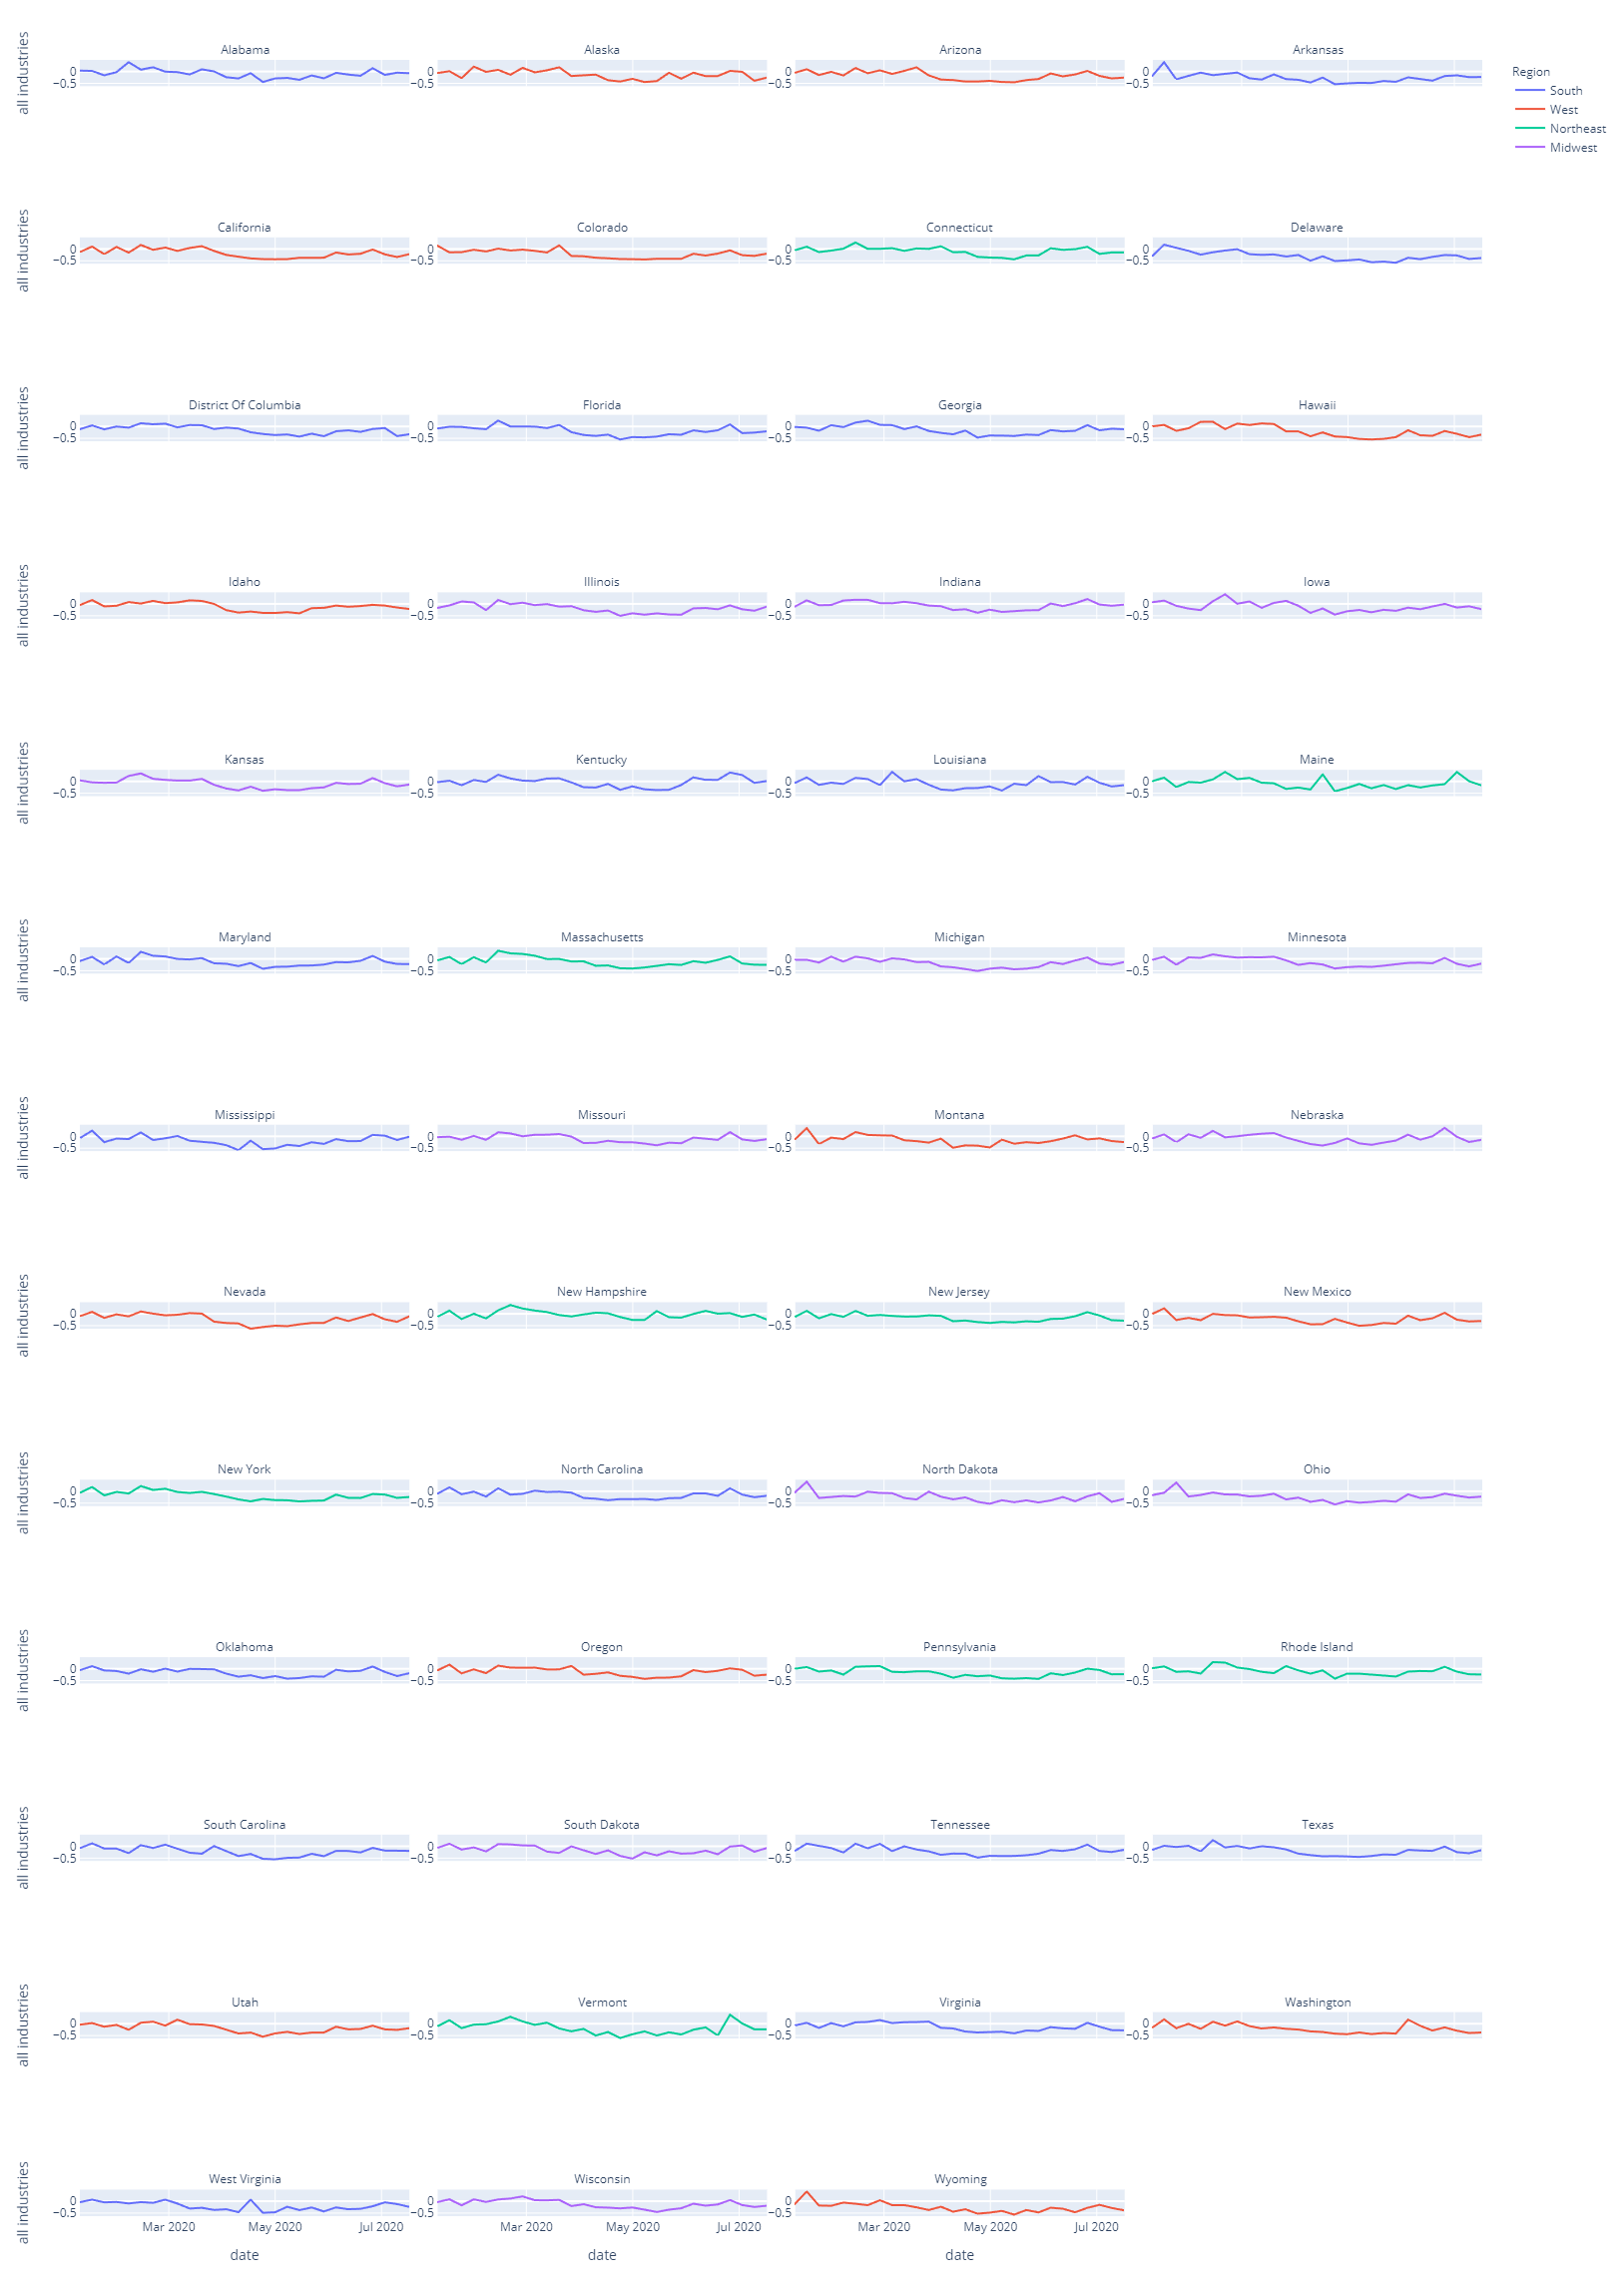

In [425]:
#color_continuous_scale=px.colors.sequential.YlOrRd,
data = df_burnings_date_state
fig = px.line(data, x="date", y="all industries",facet_col='statename', color="Region",facet_col_wrap=4,height=2300)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

### Average level of job postings relative to January 4-31 2020 (statewise)

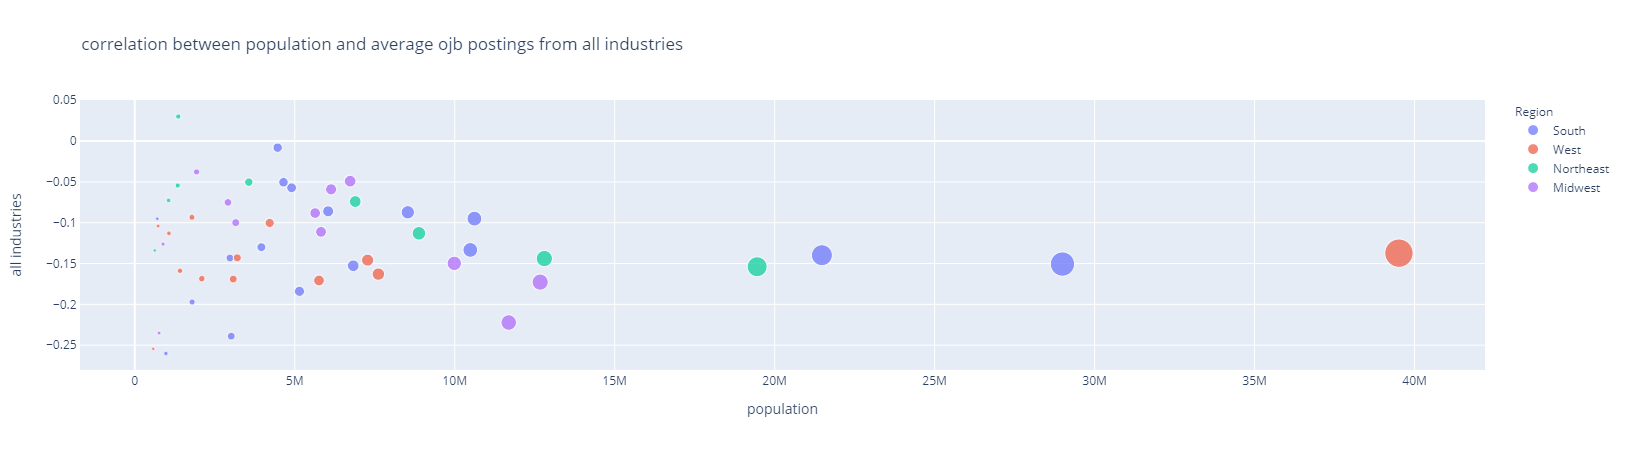

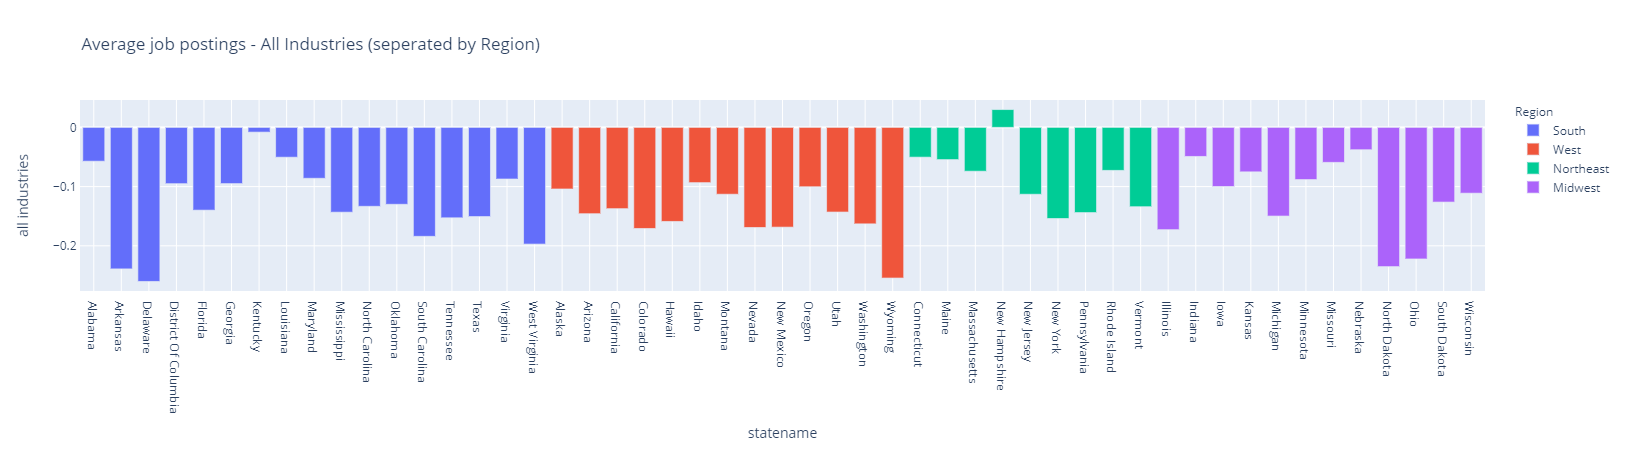

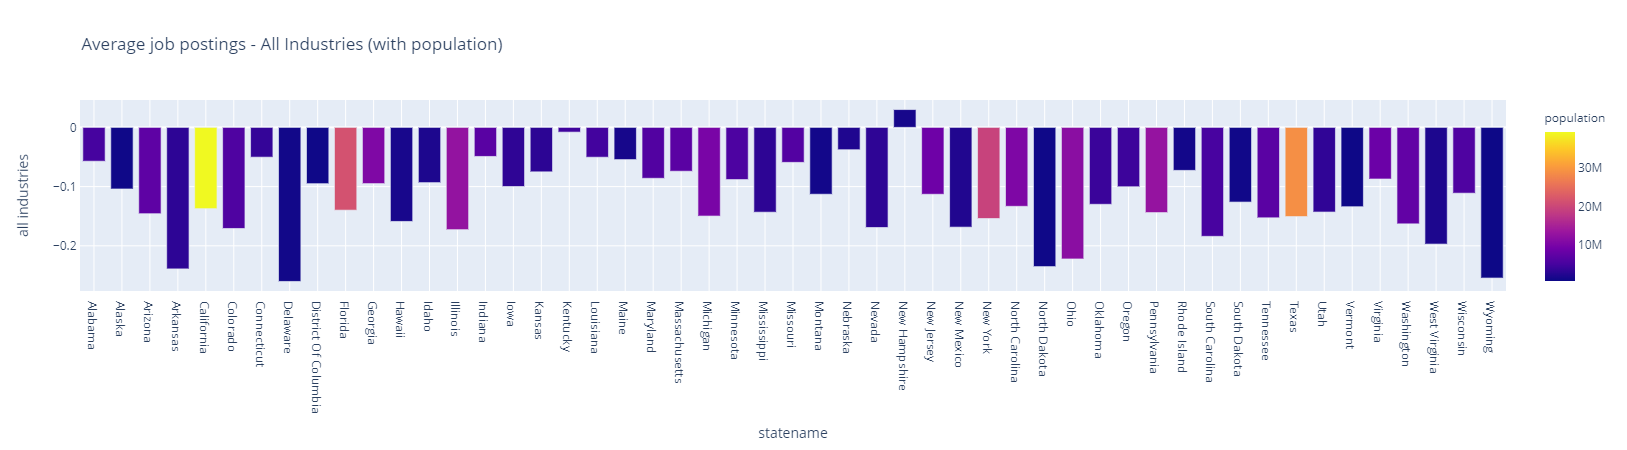

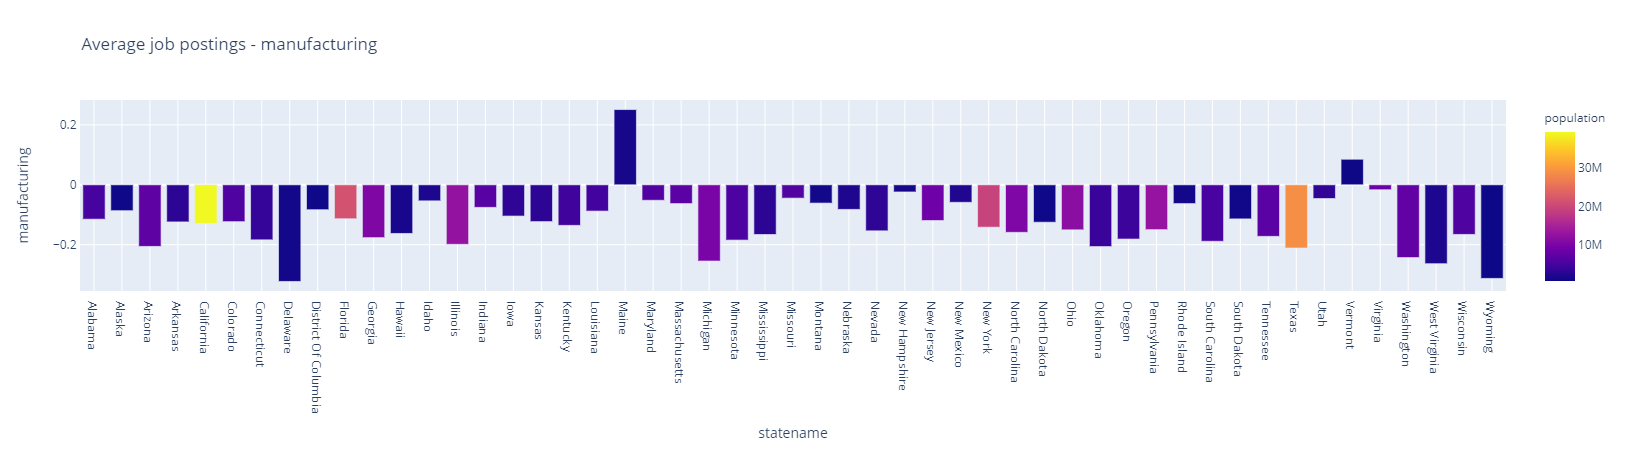

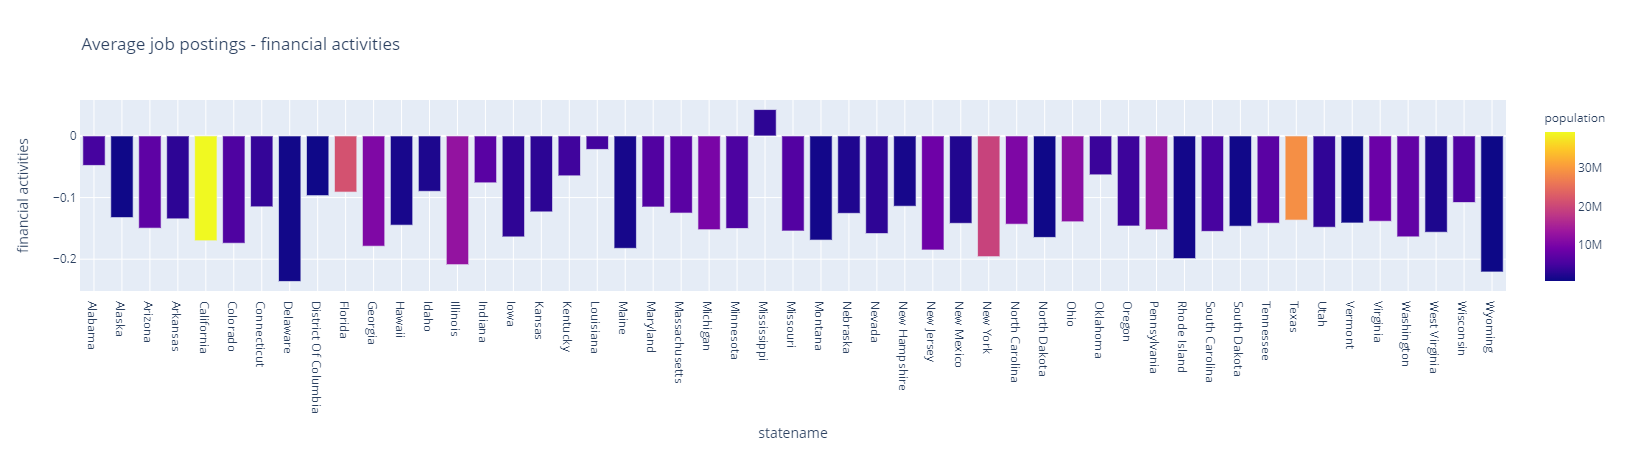

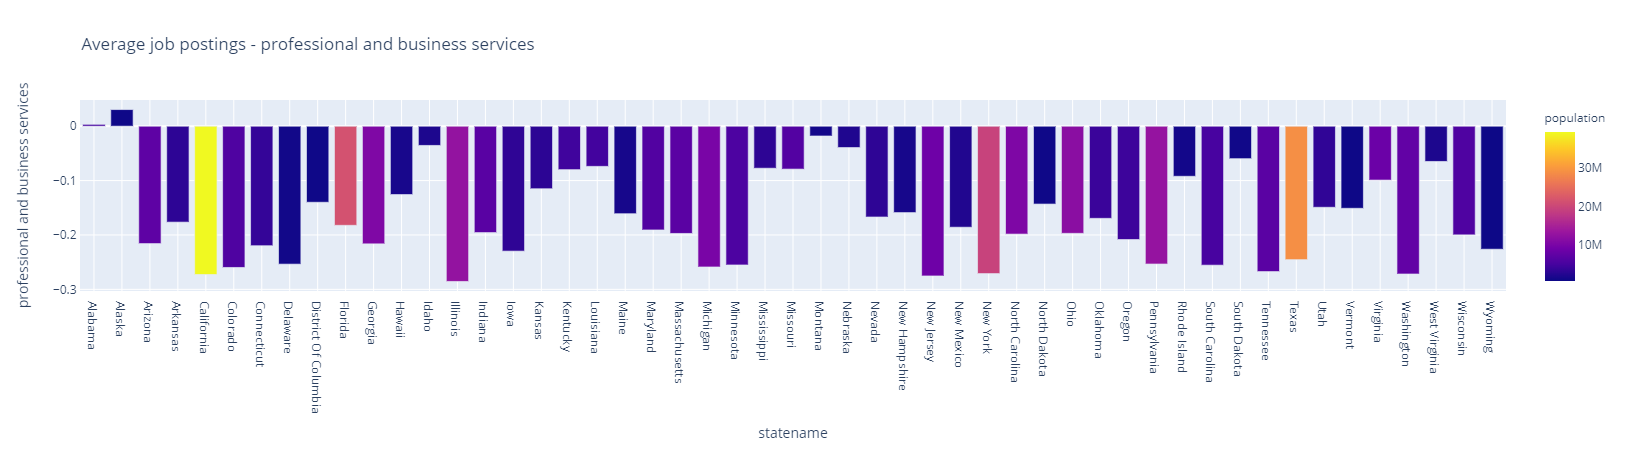

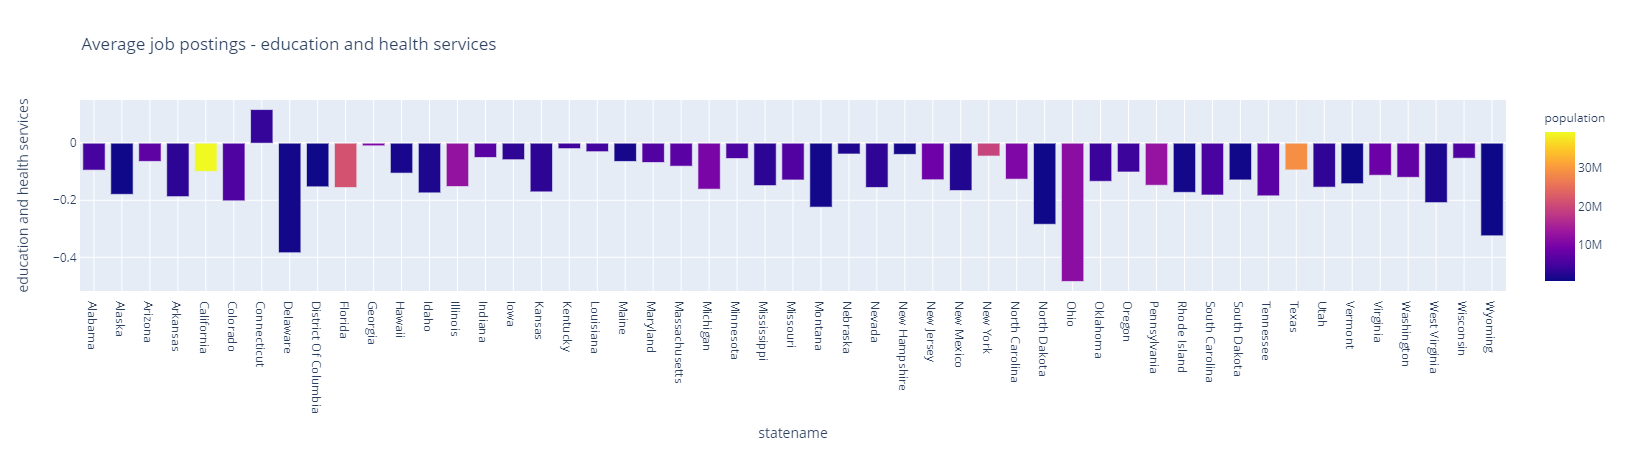

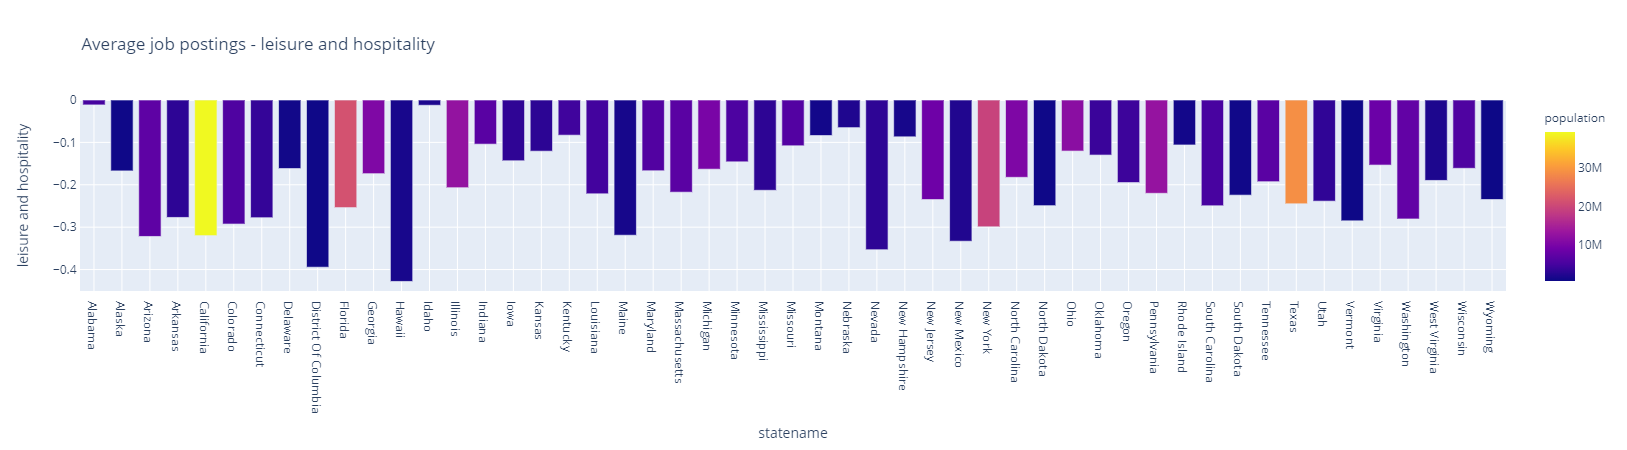

In [445]:
fig = px.scatter(df_burnings_state,y="all industries",x="population",color="Region",hover_data=["statename"],size="population",title="correlation between population and average ojb postings from all industries")
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='all industries',title="Average job postings - All Industries (seperated by Region)",color='Region')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='all industries',title="Average job postings - All Industries (with population)",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='manufacturing',title="Average job postings - manufacturing",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='financial activities',title="Average job postings - financial activities",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='professional and business services',title="Average job postings - professional and business services	",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='education and health services',title="Average job postings - education and health services",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='leisure and hospitality',title="Average job postings - leisure and hospitality",color='population')
fig.show()

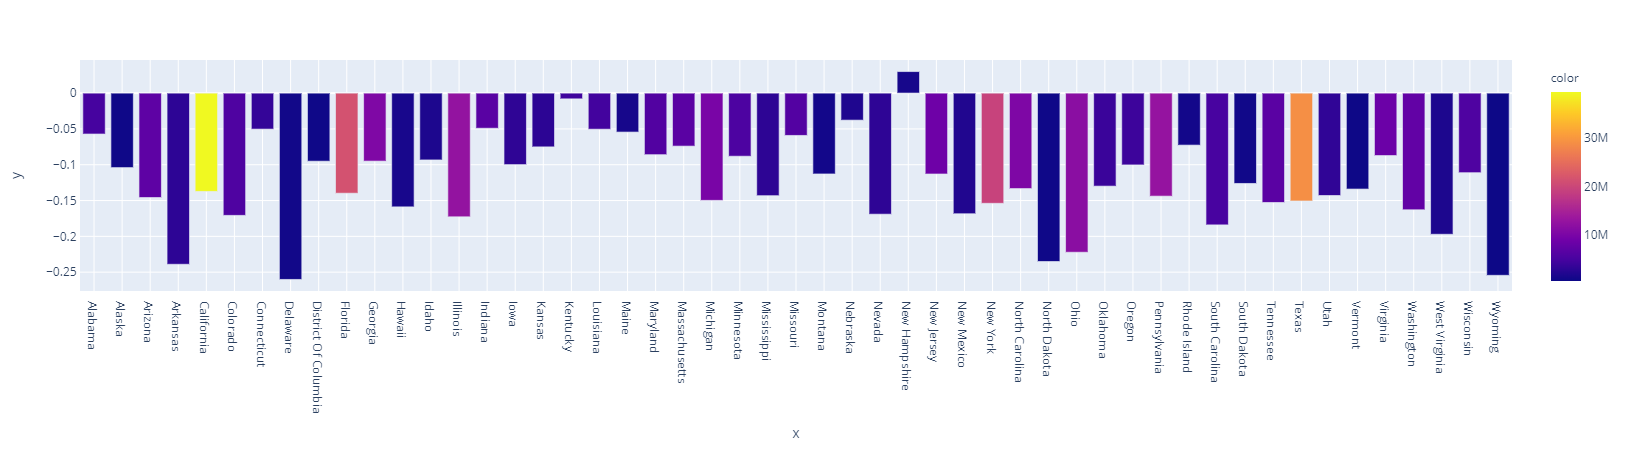

In [350]:
fig = go.Figure(px.bar(x=data['statename'],y=data['all industries'],color=data['population']))
fig